In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
%matplotlib inline

import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

GPU is available


In [2]:
## Load the dateset
TRAIN_DIR = './FER2013/train/'
TEST_DIR = './FER2013/test/'

In [3]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(    
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.3,
)

validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all train images
train_generator = train_data_gen.flow_from_directory(
        TRAIN_DIR,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

# Preprocess all validation images
validation_generator = validation_data_gen.flow_from_directory(
        TEST_DIR,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
# train_X = np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
# train_Y = np.concatenate([train_generator.next()[1] for i in range(train_generator.__len__())])
# val_X = np.concatenate([validation_generator.next()[0] for i in range(validation_generator.__len__())])
# val_Y = np.concatenate([validation_generator.next()[1] for i in range(validation_generator.__len__())])

In [5]:
train_X = np.empty([28709, 48, 48, 1])
train_Y = np.empty([28709, 7])
start = 0
end = 0
for i in range(0, 449):
    image, label = train_generator.next()
    end = end + image.shape[0]
    train_X[start:end, :, :, :] = image
    train_Y[start:end, :] = label
    start = start + image.shape[0]

In [6]:
val_X = np.empty([7178, 48, 48, 1])
val_Y = np.empty([7178, 7])
start = 0
end = 0
for i in range(0, 113):
    image, label = validation_generator.next()
    end = end + image.shape[0]
    val_X[start:end, :, :, :] = image
    val_Y[start:end, :] = label
    start = start + image.shape[0]

### CNN: Model 1

In [7]:
# create model structure
simple_model = Sequential([
    #block-1
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    #block-2
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    
    #block-3
    Dense(7, activation='softmax')
])

simple_model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001,epsilon=1e-06),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

simple_model.summary()
# Train the neural network/model
simple_model_info = simple_model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

2022-12-07 21:16:20.369168: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-07 21:16:20.369644: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 32)        0         
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 512)               7930368   
                          

2022-12-07 21:16:20.855556: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-07 21:16:21.220239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


447/449 [============================>.] - ETA: 0s - loss: 1.7440 - accuracy: 0.2956

2022-12-07 21:16:33.839781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


449/449 [==============================] - 15s 29ms/step - loss: 1.7432 - accuracy: 0.2960 - val_loss: 1.6316 - val_accuracy: 0.3735
Epoch 2/10
449/449 [==============================] - 14s 31ms/step - loss: 1.6450 - accuracy: 0.3567 - val_loss: 1.5571 - val_accuracy: 0.4072
Epoch 3/10
449/449 [==============================] - 13s 30ms/step - loss: 1.5973 - accuracy: 0.3851 - val_loss: 1.4963 - val_accuracy: 0.4324
Epoch 4/10
449/449 [==============================] - 13s 30ms/step - loss: 1.5535 - accuracy: 0.3996 - val_loss: 1.4641 - val_accuracy: 0.4402
Epoch 5/10
449/449 [==============================] - 13s 28ms/step - loss: 1.5231 - accuracy: 0.4171 - val_loss: 1.4465 - val_accuracy: 0.4466
Epoch 6/10
449/449 [==============================] - 13s 29ms/step - loss: 1.4996 - accuracy: 0.4272 - val_loss: 1.4212 - val_accuracy: 0.4539
Epoch 7/10
449/449 [==============================] - 13s 28ms/step - loss: 1.4770 - accuracy: 0.4366 - val_loss: 1.3920 - val_accuracy: 0.4699
Epo

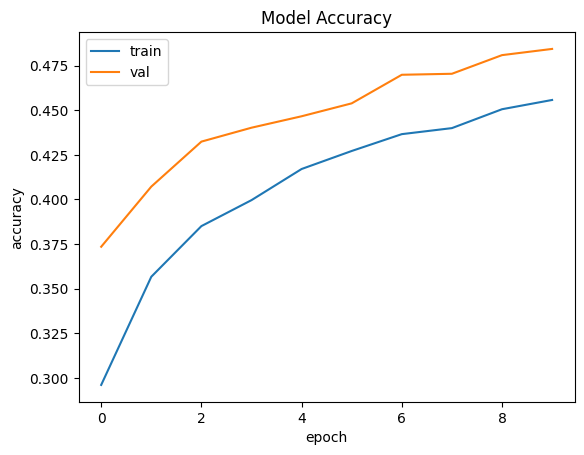

In [8]:
# plot accuracy
plt.plot(simple_model_info.history['accuracy'])
plt.plot(simple_model_info.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

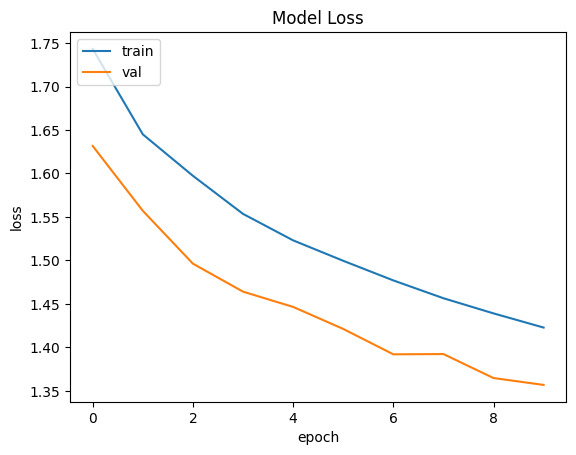

In [9]:
# plot loss
plt.plot(simple_model_info.history['loss'])
plt.plot(simple_model_info.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### CNN: Model 2

In [10]:
# create model structure
emotion_model = Sequential([
    #block-1
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    #block-2
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    #block-3
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    #block-4
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    
    #block-5
    Dense(512, activation='relu'),   
    Dropout(0.2),
    Dense(7, activation='softmax')
])

emotion_model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001,epsilon=1e-06),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

emotion_model.summary()

# Train the neural network/model
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=60,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 44, 44, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 18, 18, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                  

2022-12-07 21:18:34.116364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


447/448 [============================>.] - ETA: 0s - loss: 1.8212 - accuracy: 0.2504

2022-12-07 21:18:46.999583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


448/448 [==============================] - 15s 31ms/step - loss: 1.8209 - accuracy: 0.2505 - val_loss: 1.7942 - val_accuracy: 0.2524
Epoch 2/60
448/448 [==============================] - 13s 30ms/step - loss: 1.7784 - accuracy: 0.2565 - val_loss: 1.7362 - val_accuracy: 0.2916
Epoch 3/60
448/448 [==============================] - 13s 30ms/step - loss: 1.7106 - accuracy: 0.3058 - val_loss: 1.6432 - val_accuracy: 0.3622
Epoch 4/60
448/448 [==============================] - 13s 30ms/step - loss: 1.6448 - accuracy: 0.3454 - val_loss: 1.5648 - val_accuracy: 0.3940
Epoch 5/60
448/448 [==============================] - 13s 30ms/step - loss: 1.5857 - accuracy: 0.3770 - val_loss: 1.4830 - val_accuracy: 0.4302
Epoch 6/60
448/448 [==============================] - 13s 30ms/step - loss: 1.5364 - accuracy: 0.4058 - val_loss: 1.4352 - val_accuracy: 0.4491
Epoch 7/60
448/448 [==============================] - 14s 32ms/step - loss: 1.4929 - accuracy: 0.4253 - val_loss: 1.4254 - val_accuracy: 0.4404
Epo

448/448 [==============================] - 13s 30ms/step - loss: 0.9257 - accuracy: 0.6528 - val_loss: 1.0709 - val_accuracy: 0.5996
Epoch 58/60
448/448 [==============================] - 14s 30ms/step - loss: 0.9178 - accuracy: 0.6586 - val_loss: 1.0583 - val_accuracy: 0.6038
Epoch 59/60
448/448 [==============================] - 14s 31ms/step - loss: 0.9101 - accuracy: 0.6592 - val_loss: 1.0534 - val_accuracy: 0.6049
Epoch 60/60
448/448 [==============================] - 14s 31ms/step - loss: 0.9021 - accuracy: 0.6640 - val_loss: 1.0609 - val_accuracy: 0.6083


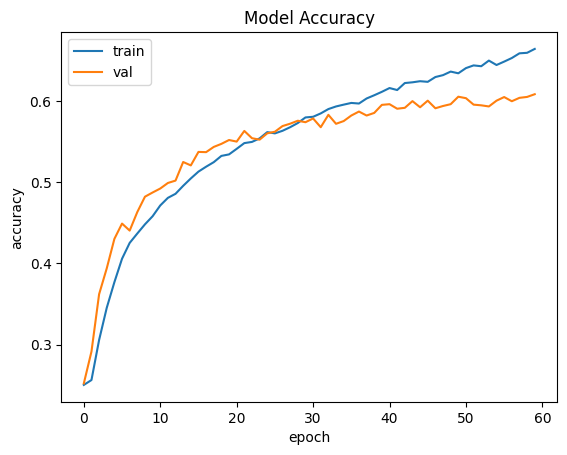

In [11]:
# plot accuracy
plt.plot(emotion_model_info.history['accuracy'])
plt.plot(emotion_model_info.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

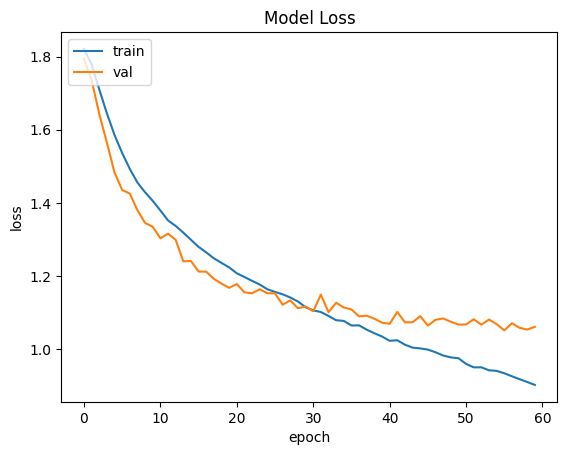

In [12]:
# plot loss
plt.plot(emotion_model_info.history['loss'])
plt.plot(emotion_model_info.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
np.random.seed(100)
images, labels = next(validation_generator)
test_loss, test_acc = emotion_model.evaluate(images, labels, verbose=2)

2/2 - 0s - loss: 1.2980 - accuracy: 0.6250 - 56ms/epoch - 28ms/step


In [14]:
emotion_model.save('my_cnn_model.h5')